<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module4/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Linear Regression is a fundamental statistical method used for modeling the relationship between a dependent variable and one or more independent variables. It offers a straightforward way to understand how the value of the dependent variable changes when one or more independent variables are varied.

## The Linear Regression Model

In its general form, the linear regression model is expressed as:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$$

Where:

- **$ y $**: The dependent (target) variable.
- **$ x_1, x_2, \ldots, x_n $**: The independent (feature) variables.
- **$ \beta_0 $**: The intercept, representing the value of $ y $ when all $ x $ variables are zero.
- **$ \beta_1, \beta_2, \ldots, \beta_n $**: The coefficients that measure the change in $ y $ with a one-unit change in the corresponding $ x $ variable.
- **$ \epsilon $**: The error term, accounting for the difference between the observed and predicted values.

## Evaluating the Model

Common metrics used to evaluate the performance of a linear regression model include:

- **Mean Squared Error (MSE)**: Measures the average squared difference between the actual and predicted values.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, providing an error metric in the same units as the target variable.
- **Coefficient of Determination (R²)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.


#Code

We will implement basic Linear Regression model for a data containing 3 features and 200 rows

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

##Load data

In [2]:
df = pd.read_csv('advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
X_data = df.drop(['Sales'] , axis = 1)
y_data = df['Sales']

Testing

In [10]:
arr = [X_data.iloc[:5, 0].sum(), X_data.iloc[:5, 1].sum(),
       X_data.iloc[:5, 2].sum(), y_data.iloc[:5].sum()]

print(arr)

[624.1, 175.10000000000002, 300.5, 78.9]


##Core functions

In [25]:
def initialize_params(N):
  #Uncomment these lines of code for general use.
  #W = np.array([random.gauss ( mu =0.0 , sigma =0.01) for _ in range(N)])
  #b = random.gauss ( mu =0.0 , sigma =0.01)

  #In this case, I will use the provided params
  W = np.array([0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344])
  b = 0

  return W, b

In [12]:
def predict(X_data , w , b):
  return np.dot(X_data , w) + b

y = predict(X_data = [1, 1, 1], w = [0, 0.5, 0], b = 0.5)
print(y)

1.0


In [14]:
def compute_loss(y_hat, y):
  loss = (y_hat - y)**2
  return loss

l = compute_loss ( y_hat =1 , y =0.5)
print ( l )

0.25


In [44]:
def compute_gradient_w(X, y, y_hat):
  dl_dw = np.array(X) * 2 * (y_hat - y)
  return dl_dw

g_wi = compute_gradient_w(X = [1.0] , y = 1.0 , y_hat =0.5)
print ( g_wi )

[-1.]


In [16]:
def compute_gradient_b(y, y_hat):
  dl_db = 2 * (y_hat - y)
  return dl_db

g_b = compute_gradient_b ( y =1.0 , y_hat =0.5)
print (g_b)

-1.0


In [46]:
def update_weight_w(w, dl_dw, lr):
  w = np.array(w)
  dl_dw = np.array(dl_dw)
  return w - lr * dl_dw

after_wi = update_weight_w ( w = [1.0] , dl_dw = [-0.5] , lr = 1e-5)
print ( after_wi )

[1.000005]


In [21]:
def update_weight_b(b, dl_db, lr):
  return b - lr * dl_db

after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )

0.50001


##Linear Regression (One sample)

###Implementation

In [47]:
def implement_linear_regression(X_data , y_data , epoch_max = 50 , lr = 1e-5):
  losses = []

  N = X_data.shape[0]
  n_features = X_data.shape[1]
  W, b = initialize_params(n_features)

  for epoch in range(epoch_max):
    for i in range(N):
      x_i = X_data[i]
      y_i = y_data[i]

      y_pred = predict(x_i , W , b)

      loss = (y_pred - y_i)**2

      losses.append(loss)

      dl_dw = compute_gradient_w(x_i , y_i , y_pred)
      W = update_weight_w(W , dl_dw , lr)

      dl_db = compute_gradient_b(y_i , y_pred)
      b = update_weight_b(b , dl_db , lr)

  return W, b, losses

###Evaluate


In [48]:
W, b, losses = implement_linear_regression(X_data.to_numpy(), y_data.to_numpy(),
                                           epoch_max = 50 , lr = 1e-5)

print(W)
print(b)

[0.07405984 0.1591736  0.0175612 ]
0.13924260940219846


In [49]:
tv = 19.2
radio = 35.9
newspaper = 51.3

y_pred = predict([tv , radio , newspaper] , W , b)
print(y_pred)

8.176413319549823


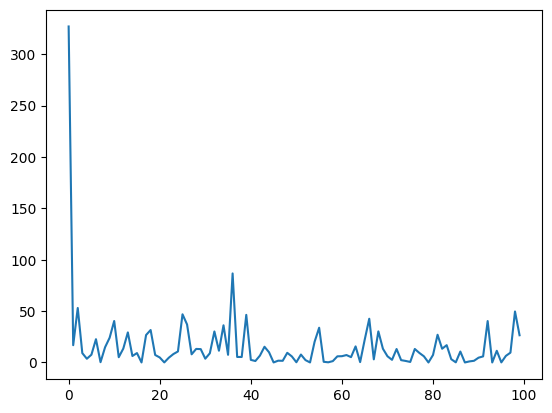

In [50]:
plt.plot(losses[:100])
plt.show()

##Linear Regression (N samples)

###Implementation

In [57]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
  losses = []
  N = X_data.shape[0]
  n_features = X_data.shape[1]
  W, b = initialize_params(n_features)

  for epoch in range(epoch_max):
    loss_total = 0.0
    # Initialize dl_dwi_total with the correct shape (3,)
    dl_dwi_total = np.zeros(n_features)
    dl_db_total = 0.0

    for i in range(N):
      x_i = X_data[i]
      y_i = y_data[i]

      y_pred = predict(x_i, W, b)
      loss = (y_pred - y_i)**2

      loss_total += loss

      dl_dwi = compute_gradient_w(x_i, y_i, y_pred)
      dl_dwi_total += dl_dwi  # Now the shapes are compatible

      dl_db = compute_gradient_b(y_i, y_pred)
      dl_db_total += dl_db

    # Update W for each feature using the averaged total gradient
    W = update_weight_w(W, dl_dwi_total / N, lr)

    losses.append(loss_total/N)

  return W, b, losses

###Evaluate

In [58]:
W, b, losses = implement_linear_regression_nsamples(X_data.to_numpy(),
                                                    y_data.to_numpy(),
                                                    epoch_max = 1000,
                                                    lr = 1e-5)

print(W)
print(b)

[0.06715466 0.15771389 0.02971895]
0


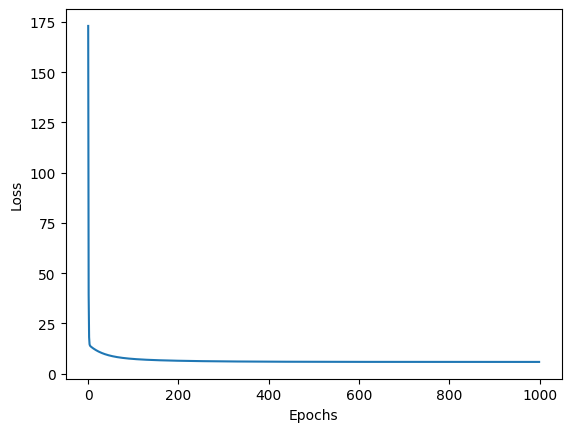

In [60]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()